[-0.3309163003605102, -2.406100592925939, -0.6498285905661455, -1.5649703635250898, -0.7723490587575073, -0.6592106427257514, -1.7078508218634376, -0.7117413009310247, -1.3176364375761689, -0.910445978543061]


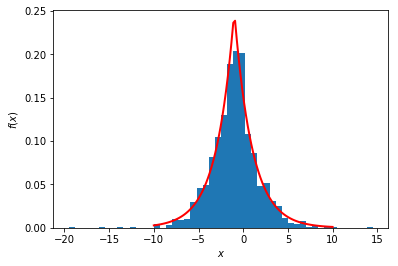

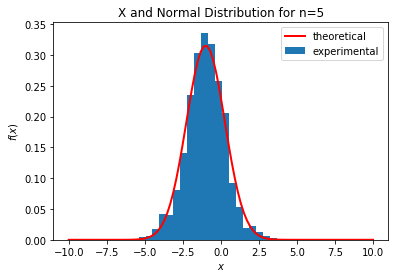

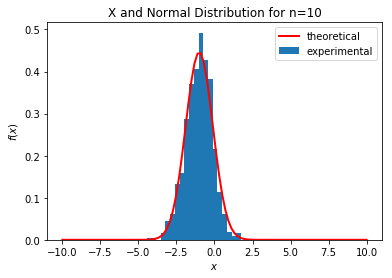

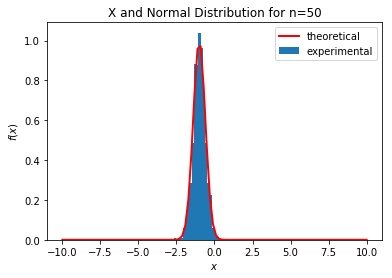

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# distribution
# In probability theory and statistics, the Laplace distribution is a continuous probability distribution
# named after Pierre-Simon Laplace. 
# It is also sometimes called the double exponential distribution, 
# because it can be thought of as two exponential distributions 
# (with an additional location parameter) spliced together back-to-back, 
# although the term is also sometimes used to refer to the Gumbel distribution. 
# The difference between two independent identically distributed exponential random variables
# is governed by a Laplace distribution, as is a Brownian motion evaluated at an exponentially distributed random time. 
# Increments of Laplace motion or a variance gamma process evaluated over the time scale also have a Laplace distribution.

ex = -1.0
scale = 2.0
distribution = stats.laplace(loc = ex, scale = scale)

# calculate the real dispersion/variance for the given laplasse distribution
# it is 2*scale^2: 2 * 4 = 8
dx = distribution.var()

# generate 1000 values from distribution for the hist vs pdf plot
values = distribution.rvs(size = 1000)

# x axis bounds
left = -10
right = 10

# hist and probability density function
plt.hist(values, 50, normed=True)
x = np.linspace(left, right, num=100)
y = distribution.pdf(x)
plt.plot(x, y, linewidth=2, color='r')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

k = 1000 #number of samples
def sample(n):
    samples = np.zeros(k)
    for index in range(k):
        # for each sample find its average, the result array is our X estimation 
        samples[index] = distribution.rvs(size = n).mean()      
    return samples

# create a histogram of X estimation
def clt(n):
    plt.title(f"X and Normal Distribution for n={n}")
    samples = sample(n)
    # hist and probability density function
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.hist(samples, 20, normed=True, label="experimental")
    # count parameters for normal distributions approximating averages
    # the mean is the same as for distribution,so just reuse it
    sigma = math.sqrt(dx / n)
    norm_rv = stats.norm(loc = ex, scale = sigma) 
    x = np.linspace(left, right, num=100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, linewidth=2, color='r', label='theoretical')
    plt.legend(loc = 'upper right')
    
# for n = 5, 10, 50 generate 1000 samples with size n    
for n in [5, 10, 50]:
    plt.figure()
    clt(n)
    plt.show()
        
# Conclusion
# Central theorem works!
# Even for small n approximation is very close to the actual values.
# The more n the better approximation. 